In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/Sid-Certificates/Dataset/CreditCardFraudDetection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
fraud=df[df['Class']==1]
norm=df[df['Class']==0]

In [5]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
norm['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Text(0.5, 0, 'Amount')

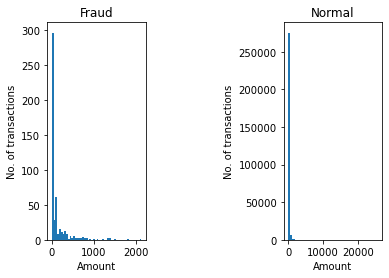

In [7]:
plt.subplot(1,3,1)
plt.title('Fraud')
plt.hist(fraud['Amount'],bins=50)
plt.ylabel('No. of transactions')
plt.xlabel('Amount')
plt.subplot(1,3,3)
plt.title('Normal')
plt.hist(norm['Amount'],bins=50)
plt.ylabel('No. of transactions')
plt.xlabel('Amount')

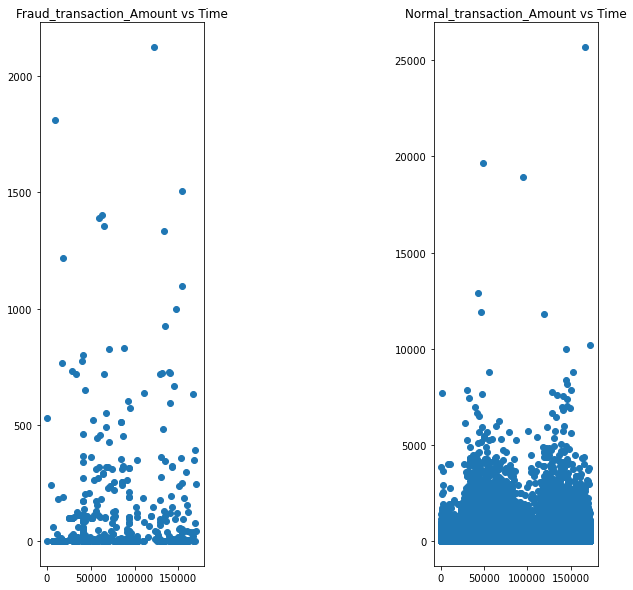

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Fraud_transaction_Amount vs Time')
plt.scatter(x=fraud['Time'],y=fraud['Amount'])
plt.subplot(1,3,3)
plt.title('Normal_transaction_Amount vs Time')
plt.scatter(x=norm['Time'],y=norm['Amount'])

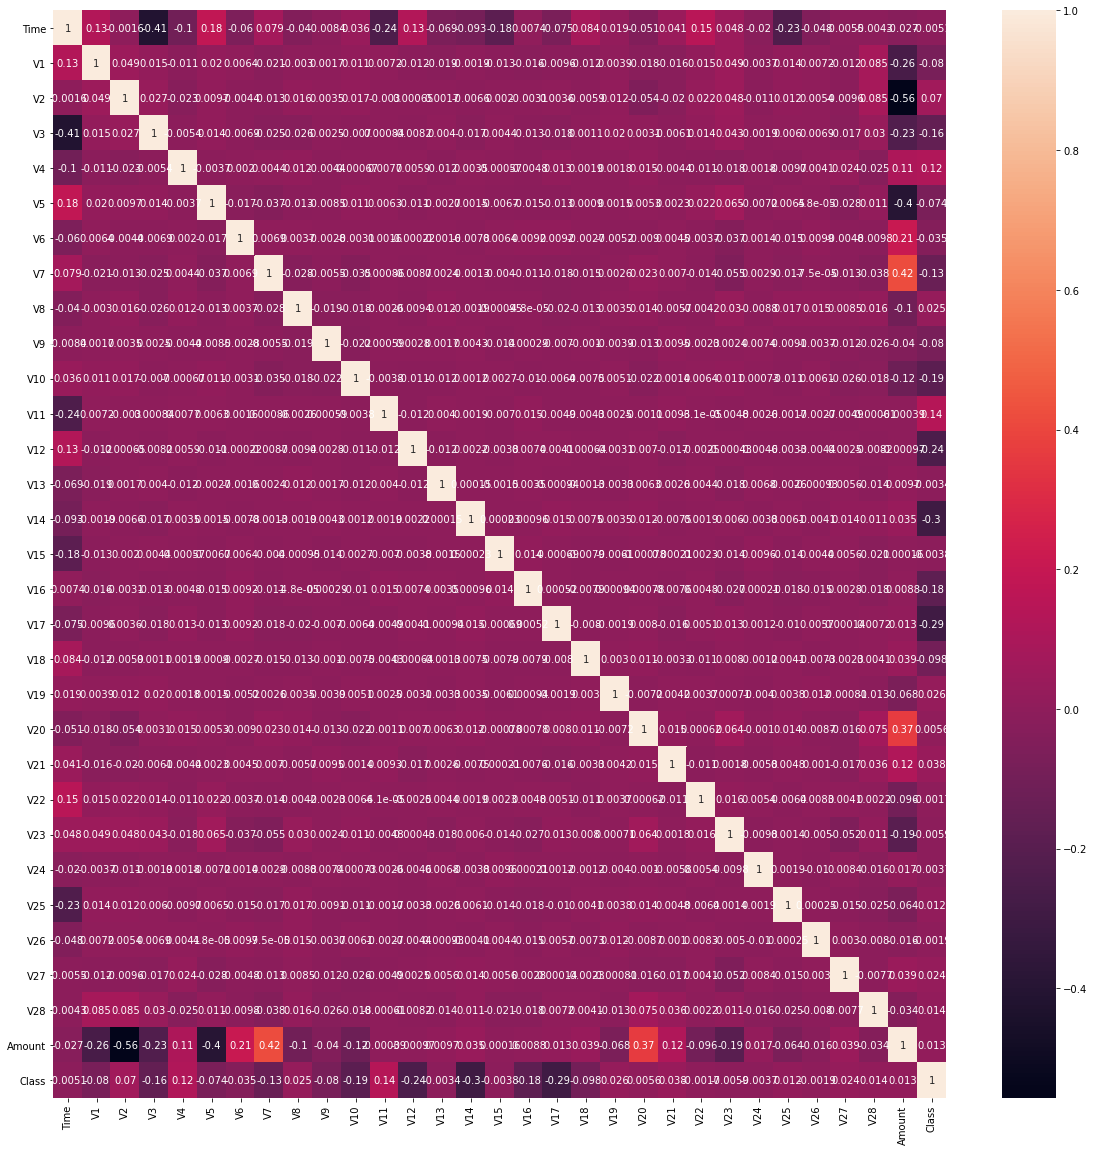

In [9]:
samp=df.sample(frac=0.1,random_state=1)
fraud=samp[samp['Class']==1]
norm=samp[samp['Class']==0]
cont=len(fraud)/len(norm)
plt.figure(figsize=(20,20))
sns.heatmap(samp.corr(),annot=True)

In [10]:
X=samp.drop('Class',axis=1)
Y=samp['Class']

In [11]:
from sklearn.svm import OneClassSVM
model1=OneClassSVM()
model1.fit(X)
pred1=model1.predict(X)
pred1[pred1==1]=0
pred1[pred1==-1]=1
print(pred1)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,pred1))

[0 0 0 ... 1 0 0]
0.5000877778167901


In [12]:
from sklearn.ensemble import IsolationForest
model2=IsolationForest(n_estimators=100,contamination=cont)
model2.fit(X)
pred2=model2.predict(X)
pred2[pred2==1]=0
pred2[pred2==-1]=1
from sklearn.metrics import accuracy_score
print(accuracy_score(Y,pred2))

0.9970155542291352


In [13]:
import pickle
filename='isoForest_anomaly.pkl'
pickle.dump(model2,open(filename,'wb'))